***Summary: This notebook provides an overview of the nitrogen cross sections from Phelps that are in NEPC.***

In [1]:
import nepc
from nepc.util import config
import numpy as np
import pandas as pd

In [2]:
pd.set_option('max_colwidth', 100)

***NOTE: You may need to modify the `local` argument in the next command.  `local=True` points to a local copy of the NEPC database. `local=False` points to the NEPC server.***

In [3]:
cnx, cursor = nepc.connect(local=True)

# Full Phelps dataset

In [4]:
n_phelps = nepc.Model(cursor, "phelps")

In [5]:
n_phelps.summary()

Number of cross sections in model: 27


,cs_id,specie,lhsA,rhsA,process,reaction,threshold,E_peak,E_upper,sigma_max,lpu,upu
0,424,N2,N2(X1Sigmag+),N2(X1Sigmag+)_jSCHULZ,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+ j_{SCHULZ}$) + e$^-$,0.02,2.3,3.6,6.9e-20,-1,-1
1,426,N2,N2(X1Sigmag+),N2(X1Sigmag+)_jSLAR,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+ j_{SLAR}$) + e$^-$,0.02,2.2,3.6,2.77e-20,-1,-1
2,436,N2,N2(X1Sigmag+),N2(A3Sigmau+)_v0-4,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (A ${}^3\Sigma_u^+ v_{0-4}$) + e$^-$,6.17,16,70,1.5e-22,-1,-1
3,437,N2,N2(X1Sigmag+),N2(A3Sigmau+)_v5-9,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (A ${}^3\Sigma_u^+ v_{5-9}$) + e$^-$,7,16,70,6.5e-22,-1,-1
4,438,N2,N2(X1Sigmag+),N2(B3Pig),excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (B ${}^3\Pi_g$) + e$^-$,7.35,12,70,2.003e-21,-1,-1
5,439,N2,N2(X1Sigmag+),N2(W3Deltau),excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (W ${}^3\Delta_u$) + e$^-$,7.36,16,100,2.546e-21,-1,-1
6,440,N2,N2(X1Sigmag+),N2(A3Sigmau+)_v10-,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (A ${}^3\Sigma_u^+ v_{10-}$) + e$^-$,7.8,17,70,6.7e-22,-1,-1
7,441,N2,N2(X1Sigmag+),N2(Bp3Sigmau-),excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (B${}^{'} $ ${}^3\Sigma_u^-$) + e$^-$,8.16,15,70,8.38e-22,-1,-1
8,442,N2,N2(X1Sigmag+),N2(ap1Sigmau-),excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (a${}^{'}$ ${}^1\Sigma_u^-$) + e$^-$,8.4,15,150,6.97e-22,-1,-1
9,443,N2,N2(X1Sigmag+),N2(a1Pig),excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (a ${}^1\Pi_g$) + e$^-$,8.55,17,1000,2.023e-21,-1,-1


# Electron-impact excitation of $\text{N}_2$

All excitations (pure electronic, rotational, and vibrational) of $\text{N}_2$ are from the ground electronic state, $\text{N}_2 (\text{X} {}^1\Sigma_g^+)$.

There is no data in Phelps to support follow-on excitation of excited states.

Excitation from $\text{N}_2 (\text{X} {}^1\Sigma_g^+)$ to $\text{N}_2 (\text{A} {}^3\Sigma_u^+)$ supports vibrational excitations, but vibrational levels of product state ($\text{N}_2 (\text{A} {}^3\Sigma_u^+)$) are grouped: $v_{0-4}$, $v_{5-9}$, and $v_{10-}$.

Rotational excitations within the $\text{N}_2 (\text{X} {}^1\Sigma_g^+)$ state are supported via the single level approximation to rotation (SLAR) (see `cs_id = 426`). Another option would be to use the cross sections for the resonance region (provided, see `cs_id = 424`) along with the CAR approximation (not provided) in place of the SLAR approximation.

De-excitation rates should be computed using detailed balance.

In [6]:
n_phelps.cs[0].metadata

{'cs_id': 424,
 'specie': 'N2',
 'process': 'excitation',
 'units_e': 1.0,
 'units_sigma': 1.0,
 'ref': '\\N',
 'lhsA': 'N2(X1Sigmag+)',
 'lhsB': None,
 'rhsA': 'N2(X1Sigmag+)_jSCHULZ',
 'rhsB': None,
 'threshold': 0.02,
 'wavelength': -1.0,
 'lhs_v': -1,
 'rhs_v': -1,
 'lhs_j': -1,
 'rhs_j': -1,
 'background': 'This contribution to rotational excitation (resonance - USING SUM OF SCHULZ VIBRATION IN A SINGLE-LEVEL APPROXIMATION) is not part of the complete set.  Use of this cross section in addition to the CAR approximation could be used in place of the single level approximation for rotation which is presently part of the complete set.',
 'lpu': -1.0,
 'upu': -1.0,
 'lhsA_long': 'N${}_2$ (X ${}^1\\Sigma_g^+$)',
 'lhsB_long': None,
 'rhsA_long': 'N${}_2$ (X ${}^1\\Sigma_g^+ j_{SCHULZ}$)',
 'rhsB_long': None,
 'e_on_lhs': 0,
 'e_on_rhs': 1,
 'hv_on_lhs': 0,
 'hv_on_rhs': 0,
 'v_on_lhs': 0,
 'v_on_rhs': 0,
 'j_on_lhs': 0,
 'j_on_rhs': 0}

In [7]:
n_phelps.summary(filter={'process': 'excitation'})

Number of cross sections in model: 27
Number of cross sections that match filter criteria: 14


,cs_id,specie,lhsA,rhsA,process,reaction,threshold,E_peak,E_upper,sigma_max,lpu,upu
0,424,N2,N2(X1Sigmag+),N2(X1Sigmag+)_jSCHULZ,excitation,N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+ j_{SCHULZ}$) + e$^-$,0.02,2.3,3.6,6.9e-20,-1,-1
1,426,N2,N2(X1Sigmag+),N2(X1Sigmag+)_jSLAR,excitation,N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+ j_{SLAR}$) + e$^-$,0.02,2.2,3.6,2.77e-20,-1,-1
2,436,N2,N2(X1Sigmag+),N2(A3Sigmau+)_v0-4,excitation,N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (A ${}^3\Sigma_u^+ v_{0-4}$) + e$^-$,6.17,16,70,1.5e-22,-1,-1
3,437,N2,N2(X1Sigmag+),N2(A3Sigmau+)_v5-9,excitation,N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (A ${}^3\Sigma_u^+ v_{5-9}$) + e$^-$,7,16,70,6.5e-22,-1,-1
4,438,N2,N2(X1Sigmag+),N2(B3Pig),excitation,N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (B ${}^3\Pi_g$) + e$^-$,7.35,12,70,2.003e-21,-1,-1
5,439,N2,N2(X1Sigmag+),N2(W3Deltau),excitation,N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (W ${}^3\Delta_u$) + e$^-$,7.36,16,100,2.546e-21,-1,-1
6,440,N2,N2(X1Sigmag+),N2(A3Sigmau+)_v10-,excitation,N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (A ${}^3\Sigma_u^+ v_{10-}$) + e$^-$,7.8,17,70,6.7e-22,-1,-1
7,441,N2,N2(X1Sigmag+),N2(Bp3Sigmau-),excitation,N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (B${}^{'} $ ${}^3\Sigma_u^-$) + e$^-$,8.16,15,70,8.38e-22,-1,-1
8,442,N2,N2(X1Sigmag+),N2(ap1Sigmau-),excitation,N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (a${}^{'}$ ${}^1\Sigma_u^-$) + e$^-$,8.4,15,150,6.97e-22,-1,-1
9,443,N2,N2(X1Sigmag+),N2(a1Pig),excitation,N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (a ${}^1\Pi_g$) + e$^-$,8.55,17,1000,2.023e-21,-1,-1


In [8]:
n_phelps.summary(filter={'process': 'excitation_v'})

Number of cross sections in model: 27
Number of cross sections that match filter criteria: 9


,cs_id,specie,lhsA,rhsA,process,reaction,threshold,E_peak,E_upper,sigma_max,lpu,upu
0,427,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$) + e$^-$,0.29,1.6,50,1.5e-21,-1,-1
1,428,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$) + e$^-$,0.291,2,3.6,4.8e-20,-1,-1
2,429,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$) + e$^-$,0.59,2.1,3.5,3.3e-20,-1,-1
3,430,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$) + e$^-$,0.88,2.2,3.3,2.7e-20,-1,-1
4,431,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$) + e$^-$,1.17,2.3,3.2,2.385e-20,-1,-1
5,432,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$) + e$^-$,1.47,2.4,3.3,1.53e-20,-1,-1
6,433,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$) + e$^-$,1.76,2.5,3.1,1.74e-20,-1,-1
7,434,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$) + e$^-$,2.06,2.7,3.4,9.6e-21,-1,-1
8,435,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$) + e$^-$,2.35,2.7,3.4,3.6e-21,-1,-1


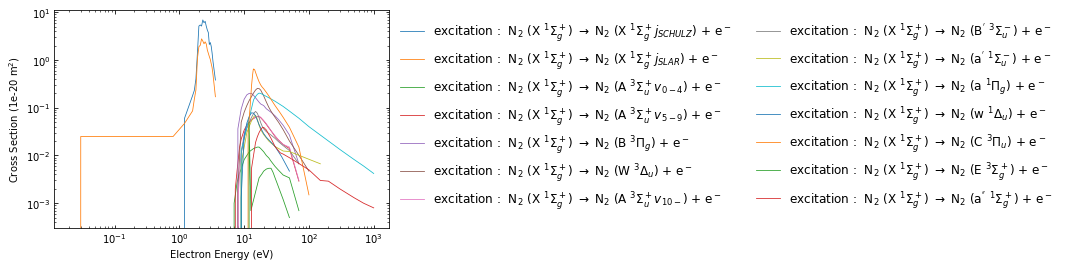

In [9]:
n_phelps.plot(units_sigma=1E-20, process='excitation',
              plot_param_dict = {'linewidth':.8}, 
              #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
              ylog=True, xlog=True, max_plots=20, width=8, height=4) 

In [10]:
cnx.close()